## **Análise Exploratória dos Dados**

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
FIG_NUMBER = 1

In [64]:
column_names = ['label', 'question_title', 'question_content', 'best_answer']

In [65]:
yahoo_df = pd.read_csv('./data/train.csv', header=None, names=column_names)

> Dimensões do DataFrame

In [66]:
yahoo_df.shape

(1400000, 4)

**c) Apresentação dos primeiros cinco registros que compõem o dataset com os respectivos campos e classe(s) associada(s) através de um dataframe.**

In [67]:
yahoo_df.head()

,label,question_title,question_content,best_answer
0,5,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...
1,6,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...
2,3,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...
3,7,How many planes Fedex has?,I heard that it is the largest airline in the ...,according to the www.fedex.com web site:\nAir ...
4,7,"In the san francisco bay area, does it make se...",the prices of rent and the price of buying doe...,renting vs buying depends on your goals. <br /...


In [68]:
yahoo_df.dtypes

label                int64
question_title      object
question_content    object
best_answer         object
dtype: object

In [69]:
yahoo_df.drop(['question_title', 'question_content'], axis=1, inplace=True)

In [70]:
yahoo_df.head()

,label,best_answer
0,5,Optical mice use an LED and a camera to rapidl...
1,6,i hear that the mojave road is amazing!<br />\...
2,3,Trans fats occur in manufactured foods during ...
3,7,according to the www.fedex.com web site:\nAir ...
4,7,renting vs buying depends on your goals. <br /...


In [71]:
label_mapping = {1: 'Society & Culture',
                    2: 'Science & Mathematics',
                    3: 'Health',
                    4: 'Education & Reference',
                    5: 'Computers & Internet',
                    6: 'Sports',
                    7: 'Business & Finance', 
                    8: 'Entertainment & Music',
                    9: 'Family & Relationships',
                    10: 'Politics & Government'
                }

yahoo_df['label_name'] = yahoo_df['label'].replace(to_replace=label_mapping)

In [72]:
yahoo_df.head()

,label,best_answer,label_name
0,5,Optical mice use an LED and a camera to rapidl...,Computers & Internet
1,6,i hear that the mojave road is amazing!<br />\...,Sports
2,3,Trans fats occur in manufactured foods during ...,Health
3,7,according to the www.fedex.com web site:\nAir ...,Business & Finance
4,7,renting vs buying depends on your goals. <br /...,Business & Finance


**d) Apresentação da distribuição das classes ao longo dos registros, incluindo um gráfico com o quantitativo de registros por classe.**  
**e) Apresentação do tamanho dos registros por cada classe usando um gráfico de box-plots.**


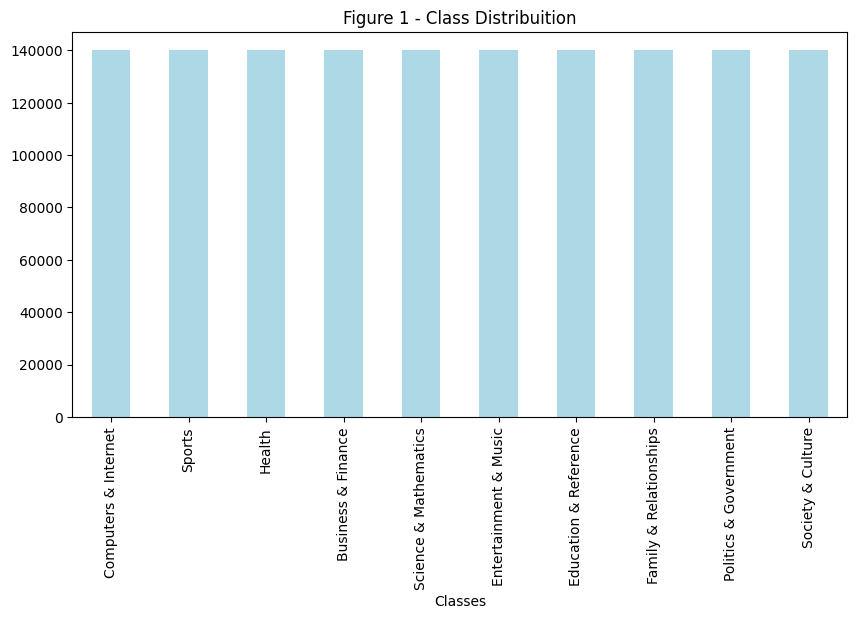

In [73]:
axis = yahoo_df['label_name'].value_counts() \
                            .plot(kind='bar',
                                  title=f'Figure {FIG_NUMBER} - Class Distribuition',
                                  figsize=(10,5),
                                  color='lightblue')


axis.set_xlabel('Classes')
plt.show()
FIG_NUMBER += 1

In [74]:
value_count = yahoo_df['label_name'].value_counts()
value_count

label_name
Computers & Internet      140000
Sports                    140000
Health                    140000
Business & Finance        140000
Science & Mathematics     140000
Entertainment & Music     140000
Education & Reference     140000
Family & Relationships    140000
Politics & Government     140000
Society & Culture         140000
Name: count, dtype: int64

In [121]:
classes_to_keep = [
    "Society & Culture",
    "Science & Mathematics",
    "Health",
    "Education & Reference",
    "Computers & Internet"
]

# new_yahoo_df = yahoo_df[yahoo_df['label_name'].isin(classes_to_keep)]

# Filtra o DataFrame para manter apenas as linhas com valores em 'classes_to_keep'
filtered_df = yahoo_df[yahoo_df['label_name'].isin(classes_to_keep)]

# Função para pegar as primeiras 500 ocorrências de cada classe
def get_top_n_per_class(df, n=500):
    return df.groupby('label_name').apply(lambda x: x.head(n)).reset_index(drop=True)

# Aplica a função para obter as primeiras 500 ocorrências de cada classe
new_yahoo_df = get_top_n_per_class(filtered_df, n=500)

# print(new_yahoo_df.head())
new_yahoo_df['label_name'].value_counts()

C:\Users\anycs\AppData\Local\Temp\ipykernel_16252\1367640440.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('label_name').apply(lambda x: x.head(n)).reset_index(drop=True)


label_name
Computers & Internet     500
Education & Reference    500
Health                   500
Science & Mathematics    500
Society & Culture        500
Name: count, dtype: int64

**b) Apresentação dos atributos que compõem o dataset, incluindo as opções de classes a serem fornecidas como resultado da classificação.**

In [76]:
set(new_yahoo_df['label_name'])

{'Computers & Internet',
 'Education & Reference',
 'Health',
 'Science & Mathematics',
 'Society & Culture'}

In [77]:
yahoo_df.shape, new_yahoo_df.shape

((1400000, 3), (700000, 3))

In [78]:
new_yahoo_df.head()

,label,best_answer,label_name
0,5,Optical mice use an LED and a camera to rapidl...,Computers & Internet
2,3,Trans fats occur in manufactured foods during ...,Health
5,5,"There are commercial kits available, but a can...",Computers & Internet
6,2,from ask yahoo...\nhttp://ask.yahoo.com/ask/20...,Science & Mathematics
8,5,"Not sure if this is the origin, but I think it...",Computers & Internet


In [79]:
def get_text_length(text):
    stringfy = str(text)
    return len(stringfy.split())

In [80]:
new_yahoo_df['words_by_answer'] = new_yahoo_df['best_answer'].apply(get_text_length)

C:\Users\anycs\AppData\Local\Temp\ipykernel_16252\543347789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_yahoo_df['words_by_answer'] = new_yahoo_df['best_answer'].apply(get_text_length)


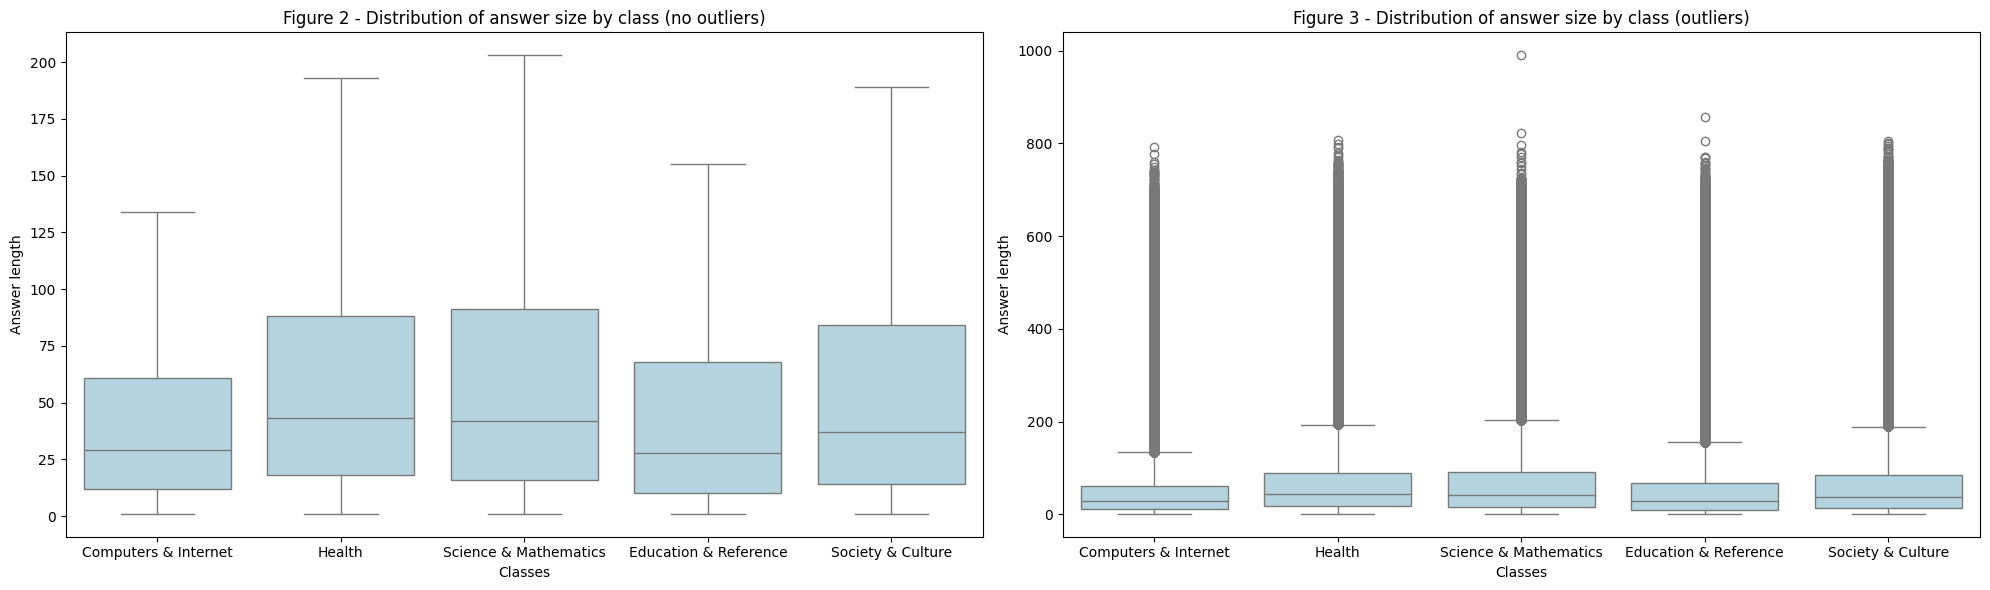

In [81]:
fig, axs = plt.subplots(1,2,figsize=(20,6))

sns.boxplot(data=new_yahoo_df, x='label_name', y='words_by_answer', color='lightblue', showfliers=False, ax=axs[0])
axs[0].set_title(f'Figure {FIG_NUMBER} - Distribution of answer size by class (no outliers)')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Answer length')

FIG_NUMBER += 1

sns.boxplot(data=new_yahoo_df, x='label_name', y='words_by_answer', color='lightblue', showfliers=True, ax=axs[1])
axs[1].set_title(f'Figure {FIG_NUMBER} - Distribution of answer size by class (outliers)')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Answer length')


plt.tight_layout()
plt.show()

## **Tokenização via Modelo Pré Treinado**

In [82]:
import torch
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, BertModel

""" tokenizer = AutoTokenizer.from_pretrained("fabriceyhc/bert-base-uncased-yahoo_answers_topics")
model = AutoModelForSequenceClassification.from_pretrained("fabriceyhc/bert-base-uncased-yahoo_answers_topics") """

' tokenizer = AutoTokenizer.from_pretrained("fabriceyhc/bert-base-uncased-yahoo_answers_topics")\nmodel = AutoModelForSequenceClassification.from_pretrained("fabriceyhc/bert-base-uncased-yahoo_answers_topics") '

**f) Utilize a classe AutoTokenizer do Transformer através do modelo pré-treinado escolhido por você para a criação dos tokens do dataset.**  
**g) Utilize o modelo pré-treinado escolhido por você através da classe AutoModel do Transformer para gerar os embeddings resultantes dos estados escondidos.**  
**h) Extraia e apresente os últimos estados escondidos.**  
**i) Converta todos os estados escondidos para uma estrutura tensor do PyTorch e passe-os como entrada para o modelo escolhido.**  
**j) Apresente a estrutura do tensor, incluindo quantos campos possui e o número de dimensões utilizados para representá-lo.**  

In [83]:
def NLP_pipeline(sentence):
    # Load model from HuggingFace Hub
    tokenizer = AutoTokenizer.from_pretrained('fabriceyhc/bert-base-uncased-yahoo_answers_topics')
    model = AutoModel.from_pretrained('fabriceyhc/bert-base-uncased-yahoo_answers_topics')

    # Tokenize sentence
    encoded_input = tokenizer(sentence, padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)
    
    # 5. Extracting the last hidden states
    # It's already as a Pytorch tensor
    last_hidden_states = model_output.last_hidden_state
    print("\nÚltimos estados escondidos (shape):", last_hidden_states.shape)

    # 6. Converter para tensor PyTorch
    # hidden_states_tensor = torch.tensor(last_hidden_states)

    # 7. Exibir a estrutura do tensor: número de tokens e dimensões
    # print("\nEstrutura do tensor (shape):", hidden_states_tensor.shape)
    return last_hidden_states

In [ ]:
NLP_pipeline(new_yahoo_df.iloc[1]['best_answer'])

In [95]:
def tokenize_text(sentence):
    # Load model from HuggingFace Hub
    tokenizer = AutoTokenizer.from_pretrained('fabriceyhc/bert-base-uncased-yahoo_answers_topics')
    model = AutoModel.from_pretrained('fabriceyhc/bert-base-uncased-yahoo_answers_topics')

    # Tokenize sentence
    encoded_input = tokenizer(sentence, padding=True, truncation=True, return_tensors='pt')

    return encoded_input

In [96]:
tokenize_text(new_yahoo_df.iloc[1]['best_answer'])

c:\Users\anycs\Documents\MATERIAL_11_PERIODO\PLN\Atividade 2\PLN_2024_Classifica_Texto_Silva_Any\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'input_ids': tensor([[  101,  9099,  6638,  2015,  5258,  1999,  7609,  9440,  2076,  1996,
          2832,  1997,  7704,  9732,  3370,  1010,  2043,  9732,  3806,  2003,
         11957,  2094,  2083, 15415,  3514,  2000,  3623, 11142,  2166,  1998,
         27790,  1996,  2434, 26572,  4609, 16846, 12165,  3514,  1012,  1996,
          4525,  6638,  2003,  2714,  2000, 23489,  6638,  1010,  2029, 13275,
          1000,  2919,  1000, 25510,  2140, 16480,  4244, 27833,  1998,  2064,
          2599,  2000, 18856,  8649,  5999, 28915,  1998,  2540,  4295,  1012,
          1032, 16634,  3775,  2140,  2200,  3728,  1010,  2833, 10873,  2020,
          2025,  3223,  2000,  2862,  9099,  6638,  2015,  1010,  1998,  2023,
          2740,  3891,  2815,  5023,  2000, 10390,  1012,  1999,  2220,  2251,
          1010, 17473,  7040,  2904,  1010,  1998,  2833, 10873,  2097,  2574,
          4088, 12151,  9099,  6638,  4180,  1999, 13995,  9440,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0,

## **Conjunto de Validação e Teste**

**k) Crie os vetores de treinamento e validação e apresente o seu formato utilizando o método shape.**

> Criando conjunto de treinamento, teste e validação

In [85]:
train_df = new_yahoo_df.copy()

In [86]:
train_df.head()

,label,best_answer,label_name,words_by_answer
0,5,Optical mice use an LED and a camera to rapidl...,Computers & Internet,133
2,3,Trans fats occur in manufactured foods during ...,Health,91
5,5,"There are commercial kits available, but a can...",Computers & Internet,184
6,2,from ask yahoo...\nhttp://ask.yahoo.com/ask/20...,Science & Mathematics,146
8,5,"Not sure if this is the origin, but I think it...",Computers & Internet,102


In [87]:
from sklearn.model_selection import train_test_split

In [92]:
x_train = train_df.drop(columns=['label', 'label_name'])  # Exclui a coluna de rótulos
y_train = train_df['label']  # Coluna de rótulo para o treinamento

# 2. Dividir os dados de treinamento em treino e validação
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [93]:
X_train.shape, X_val.shape

((560000, 2), (140000, 2))

> Criação do vetor de teste

In [89]:
test_df = pd.read_csv('data/test.csv')

In [94]:
test_df.shape

(59999, 4)

## **Tokenização do Texto**

In [122]:
import torch
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, BertModel

In [123]:
def tokenize_text(sentence):
    tokenizer = AutoTokenizer.from_pretrained('fabriceyhc/bert-base-uncased-yahoo_answers_topics')  
    return tokenizer(sentence, padding=True, truncation=True)

In [124]:
tokenize_text(new_yahoo_df.iloc[0]['best_answer'])

c:\Users\anycs\Documents\MATERIAL_11_PERIODO\PLN\Atividade 2\PLN_2024_Classifica_Texto_Silva_Any\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'input_ids': [101, 9380, 12328, 2224, 2019, 2419, 1998, 1037, 4950, 2000, 5901, 5425, 4871, 1997, 1996, 3302, 4218, 1996, 8000, 1012, 1996, 18558, 28649, 2013, 1996, 4950, 2003, 16578, 2011, 1037, 16233, 2361, 1006, 3617, 4742, 13151, 1007, 1998, 2109, 2000, 11487, 29238, 8496, 1999, 1996, 10318, 3302, 1998, 5646, 4367, 1012, 2070, 4475, 1010, 2107, 2004, 3221, 1010, 13536, 2030, 2060, 2200, 12538, 1010, 6375, 9972, 15115, 2007, 1996, 3754, 1997, 1996, 16233, 2361, 2000, 14125, 17908, 1996, 3302, 4218, 1996, 8000, 1012, 1032, 24978, 2378, 3401, 3221, 2003, 13338, 1998, 2200, 6375, 1010, 1996, 8000, 2003, 4039, 2000, 4060, 2039, 2438, 29238, 8496, 1999, 1996, 10318, 3302, 2000, 5646, 4367, 1012, 22243, 9972, 2024, 2036, 1037, 3291, 1010, 2144, 2027, 7887, 8339, 2067, 1996, 2168, 3746, 1010, 4786, 1996, 16233, 2361, 2025, 2000, 6807, 4367, 7919, 1012, 2043, 1996, 2291, 2003, 4039, 2000, 2156, 3302, 3431, 3378, 2007, 2929, 1010, 1996, 8000, 2097, 2025, 2147, 7919, 1012, 102], 'token_type

In [125]:
def tokenize_and_add_columns(row):
    tokenizer = AutoTokenizer.from_pretrained('fabriceyhc/bert-base-uncased-yahoo_answers_topics')  
    tokens = tokenizer(row['best_answer'], padding=True, truncation=True, return_tensors='pt')
    # Converte os tensores em listas e adiciona ao DataFrame
    row['input_ids'] = tokens['input_ids'].squeeze().tolist()
    row['attention_mask'] = tokens['attention_mask'].squeeze().tolist()
    return row

# Aplica a função ao DataFrame
new_yahoo_df = new_yahoo_df.apply(tokenize_and_add_columns, axis=1)

c:\Users\anycs\Documents\MATERIAL_11_PERIODO\PLN\Atividade 2\PLN_2024_Classifica_Texto_Silva_Any\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\anycs\Documents\MATERIAL_11_PERIODO\PLN\Atividade 2\PLN_2024_Classifica_Texto_Silva_Any\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\anycs\Documents\MATERIAL_11_PERIODO\PLN\Atividade 2

In [128]:
new_yahoo_df.head()

0       [101, 9380, 12328, 2224, 2019, 2419, 1998, 103...
1       [101, 2045, 2024, 3293, 18628, 2800, 1010, 202...
2       [101, 2025, 2469, 2065, 2023, 2003, 1996, 4761...
3       [101, 2092, 1010, 1996, 2190, 2126, 2003, 2000...
4       [101, 4638, 2041, 2023, 2609, 1024, 1032, 1869...
                              ...                        
2495    [101, 3415, 21754, 2013, 2069, 2028, 2173, 101...
2496    [101, 12043, 1012, 1012, 1012, 2009, 9041, 200...
2497    [101, 2748, 1012, 1999, 2755, 1010, 2471, 2035...
2498    [101, 2507, 2068, 2066, 2184, 14189, 2065, 204...
2499    [101, 1999, 2070, 3033, 1997, 2789, 2885, 2107...
Name: input_ids, Length: 2500, dtype: object

In [ ]:

# Função para converter listas em tensores e extrair o estado oculto
def extract_hidden_states(row):
    model = AutoModel.from_pretrained('fabriceyhc/bert-base-uncased-yahoo_answers_topics')
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Converte listas em tensores
    input_ids = torch.tensor(row['input_ids']).unsqueeze(0).to(device)  # Adiciona batch dimension
    attention_mask = torch.tensor(row['attention_mask']).unsqueeze(0).to(device)
    
    # Extraí os estados ocultos
    with torch.no_grad():
        last_hidden_state = model(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
    
    # Retorna o vetor para o token [CLS]
    return pd.Series({"hidden_state": last_hidden_state[0, 0].cpu().numpy()})

# Aplica a função ao DataFrame e adiciona a coluna 'hidden_state'
new_yahoo_df = new_yahoo_df.apply(extract_hidden_states, axis=1)

In [131]:
model = AutoModel.from_pretrained('fabriceyhc/bert-base-uncased-yahoo_answers_topics')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [132]:
# Função para converter listas em tensores e extrair o estado oculto
def extract_hidden_states(row):
    # Converte listas em tensores
    input_ids = torch.tensor(row['input_ids']).unsqueeze(0).to(device)  # Adiciona a dimensão do batch
    attention_mask = torch.tensor(row['attention_mask']).unsqueeze(0).to(device)
    
    # Extraí os estados ocultos
    with torch.no_grad():
        last_hidden_state = model(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
    
    # Retorna o vetor para o token [CLS]
    return {"hidden_state": last_hidden_state[0, 0].cpu().numpy()}

new_yahoo_df.apply(extract_hidden_states, axis=1)

new_yahoo_df.head()

,label,best_answer,label_name,input_ids,attention_mask
0,5,Optical mice use an LED and a camera to rapidl...,Computers & Internet,"[101, 9380, 12328, 2224, 2019, 2419, 1998, 103...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,5,"There are commercial kits available, but a can...",Computers & Internet,"[101, 2045, 2024, 3293, 18628, 2800, 1010, 202...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,5,"Not sure if this is the origin, but I think it...",Computers & Internet,"[101, 2025, 2469, 2065, 2023, 2003, 1996, 4761...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,5,"Well, the best way is to look at whatever prog...",Computers & Internet,"[101, 2092, 1010, 1996, 2190, 2126, 2003, 2000...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,5,check out this site:\nhttp://mathworld.wolfram...,Computers & Internet,"[101, 4638, 2041, 2023, 2609, 1024, 1032, 1869...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
